# Plotting photometry and last non detection limit. Would probably be useful to add dates where spectra are taken as dashes on the plot

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import glob,os
import matplotlib

In [2]:
t0 = 2459293.3 # 2021-3-19 19:12:0.00    
expd = t0 -  2400000.5
path = os.getcwd()
fig_path = path+'/figures/'
phot_path = path+'/phot/'

In [3]:
swift = 'SN2021gmj_swift_measurements.txt'
lco = '2021gmj_nonsub.txt'
dlt = '2021gmj_dlt40.csv'
berkeley = 'Berkeley_parsed.csv'

lcodf = pd.read_csv(phot_path+lco,delimiter=r'\s+')
lcodf['mjd'] = lcodf['jd']-2400000.5

swiftdf = pd.read_csv(phot_path+swift,delimiter=r'\s+')
#print(swiftdf)

dltdf = pd.read_csv(phot_path+dlt,delimiter=',')
dltdf['mjd'] = dltdf['jd']-2400000.5

bdf = pd.read_csv(phot_path+berkeley)

# print out csv for griffin's code formatting (MJD,mag,dmag,filter)
#lcodf.to_csv(phot_path+lco[:-4]+'.csv',columns=['MJD','mag','dmag','filter','nondet'])
with open (phot_path+'2021gmj.csv', 'w') as f:
    f.write('MJD,mag,dmag,filter,nondet,source\n')
    for i,row in lcodf.iterrows():
        f.write(str(row['mjd'])+','+str(row['mag'])+','+str(row['dmag'])+','+\
                str(row['filter'])+',False,LCO\n')
    '''for i,row in swiftdf.iterrows():
        f.write(str(row['MJD'])+','+str(row['ABmag'])+','+\
                str(np.sqrt(row['mag_e_stat']**2+row['mag_e_sys']**2))+','+\
                str(row['filter'])+',False,Swift\n')'''
    for i,row in bdf.iterrows():
        f.write(str(row['mjd'])+','+str(row['mag'])+','+ str(row['dmag'])+','+\
                str(row['filter'])+',False,Shane\n')
print('Done.')

Done.


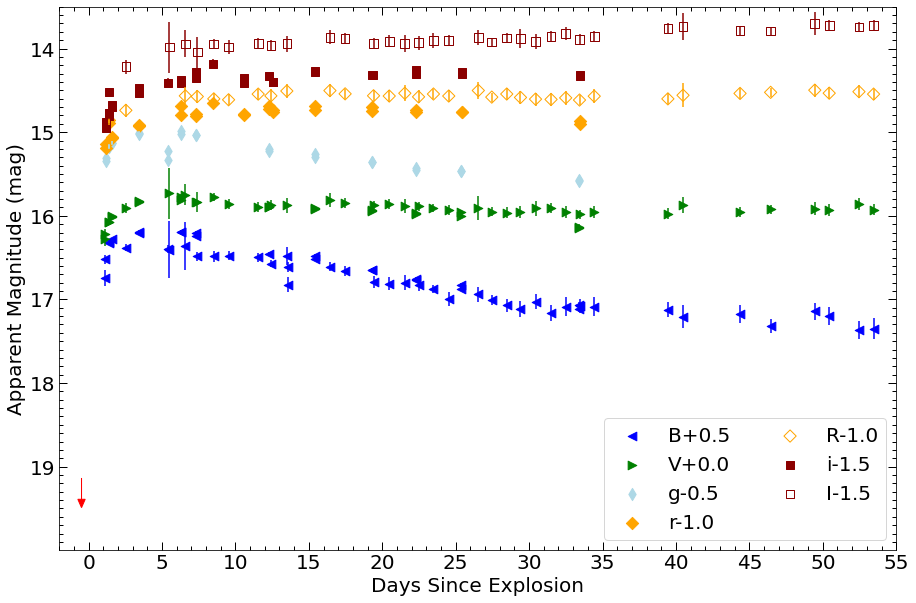

In [4]:
colorDict = {'UVW2':'black', 'UVM2':'pink', 'UVW1':'violet', 'U':'darkviolet', 'B':'blue', 'V':'green',\
          'g': 'lightblue', 'r': 'orange', 'i': 'darkred', 'R': 'orange', 'I': 'darkred'}
markerDict = {'UVW2':'d', 'UVM2':'D', 'UVW1':'s', 'U':'o', 'B':'<', 'V':'>',\
          'g': 'd', 'r': 'D', 'i': 's', 'R': 'D', 'I': 's'}
offDict = {'UVW2': 3.0, 'UVM2': 2.5, 'UVW1': 2.0, 'U': 1.5, 'B': 0.5, 'V': 0.0,\
          'g': -0.5, 'r': -1.0, 'i': -1.5, 'R': -1.0, 'I': -1.5}
labeled = {'UVW2': 0, 'UVM2': 0, 'UVW1': 0, 'U': 0, 'B': 0, 'V': 0,\
          'g': 0, 'r': 0, 'i': 0, 'R': 0, 'I': 0}
facecolor = {'UVW2':'black', 'UVM2':'pink', 'UVW1':'violet', 'U':'darkviolet', 'B':'blue', 'V':'green',\
          'g': 'lightblue', 'r': 'orange', 'i': 'darkred', 'R': 'none', 'I': 'none'}

plotOrder = ['UVW2', 'UVM2', 'UVW1', 'U', 'B', 'V', 'g', 'r','R','i','I']

alldf = pd.read_csv(phot_path+'2021gmj.csv')

pl.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 20})

# not an efficient way to loop over these at all but makes the legend in the correct order
#for ind,row in alldf.iterrows():
for filt in plotOrder:
    if filt in colorDict.keys():
        for ind,row in alldf.iterrows():
            if row['filter'] == filt:
                if not labeled[row['filter']]:
                    if offDict[row['filter']] < 0:
                        label = row['filter']+'-'+str(abs(offDict[row['filter']]))
                    elif offDict[row['filter']] >= 0:
                        label = row['filter']+'+'+str(offDict[row['filter']])
                    else:
                        label = row['filter']
                    labeled[row['filter']] = 1
                else:
                    label = ''
                pl.errorbar(row['MJD']-expd,row['mag']+offDict[row['filter']],
                         yerr=row['dmag'],
                         fmt='',color=colorDict[row['filter']])
                pl.scatter(row['MJD']-expd,row['mag']+offDict[row['filter']],
                             marker=markerDict[row['filter']],s=75,edgecolor=colorDict[row['filter']],
                             label=label,facecolor=facecolor[row['filter']])
    else:
        print(filt+' not in dictionary, will not be plotted')
    
pl.gca().tick_params(direction='in', length=8, width=1, which='major')
pl.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
pl.gca().set_yticks(np.arange(10,20,1.0))
pl.gca().set_yticks(np.arange(10,20,0.1), minor=True)
pl.gca().yaxis.set_ticks_position('both')
# x ticks
pl.gca().set_xticks(np.arange(-10,100,5))
pl.gca().set_xticks(np.arange(-10,100,1), minor=True)
pl.gca().xaxis.set_ticks_position('both')

# last non detection 
limit = 19.14
limitTime = (2459292.82 - 2400000.5) - expd
pl.arrow(limitTime, limit, 0.0, 0.25, head_width=0.5, head_length=0.1, fc='r', ec='r')

pl.xlim([-2,55])
pl.ylim([20.0,13.5])
pl.legend(loc='lower right',ncol=2)
pl.xlabel('Days Since Explosion')
pl.ylabel('Apparent Magnitude (mag)')

pl.savefig(fig_path+'lightcurve.png',format='png',dpi=300)
pl.show()

In [5]:
from astropy.time import Time

alldf = alldf.sort_values(by=['MJD'])
display(alldf)

print('')
for ind,row in alldf.iterrows():
    if row['filter'] in plotOrder:
        date = Time(row['MJD'],format='mjd')
        print( date.isot.split('T')[0]+' & '+"{:.2f}".format(round(row['MJD'],2))+\
                ' & '+"{:.2f}".format(round(row['MJD']-expd,2))+\
                ' & '+"{:.2f}".format(round(row['mag'],2))+' ('+"{:.2f}".format(round(row['dmag'],2))+\
                ') & '+row['filter']+' & '+row['source']+r' \\' )

,MJD,mag,dmag,filter,nondet,source
0,59293.94481,16.0226,0.0566,B,False,LCO
1,59293.94729,16.2443,0.0900,B,False,LCO
2,59293.94990,16.2168,0.0585,V,False,LCO
3,59293.95146,16.2826,0.0731,V,False,LCO
4,59293.95312,15.8504,0.0490,g,False,LCO
...,...,...,...,...,...,...
308,59350.25000,15.5590,0.1040,R,False,Shane
309,59350.25000,15.5670,0.1740,CLEAR,False,Shane
306,59350.25000,16.7890,0.1330,B,False,Shane
307,59350.25000,15.9030,0.0870,V,False,Shane



2021-03-20 & 59293.94 & 1.14 & 16.02 (0.06) & B & LCO \\
2021-03-20 & 59293.95 & 1.15 & 16.24 (0.09) & B & LCO \\
2021-03-20 & 59293.95 & 1.15 & 16.22 (0.06) & V & LCO \\
2021-03-20 & 59293.95 & 1.15 & 16.28 (0.07) & V & LCO \\
2021-03-20 & 59293.95 & 1.15 & 15.85 (0.05) & g & LCO \\
2021-03-20 & 59293.96 & 1.16 & 15.81 (0.04) & g & LCO \\
2021-03-20 & 59293.96 & 1.16 & 16.18 (0.07) & r & LCO \\
2021-03-20 & 59293.96 & 1.16 & 16.14 (0.05) & r & LCO \\
2021-03-20 & 59293.96 & 1.16 & 16.45 (0.07) & i & LCO \\
2021-03-20 & 59293.96 & 1.16 & 16.38 (0.07) & i & LCO \\
2021-03-21 & 59294.17 & 1.37 & 15.89 (0.03) & r & LCO \\
2021-03-21 & 59294.17 & 1.37 & 15.86 (0.03) & r & LCO \\
2021-03-21 & 59294.17 & 1.37 & 16.02 (0.03) & i & LCO \\
2021-03-21 & 59294.18 & 1.38 & 15.82 (0.02) & B & LCO \\
2021-03-21 & 59294.19 & 1.39 & 15.81 (0.02) & B & LCO \\
2021-03-21 & 59294.19 & 1.39 & 16.07 (0.03) & V & LCO \\
2021-03-21 & 59294.19 & 1.39 & 16.08 (0.03) & V & LCO \\
2021-03-21 & 59294.19 & 1.39 &

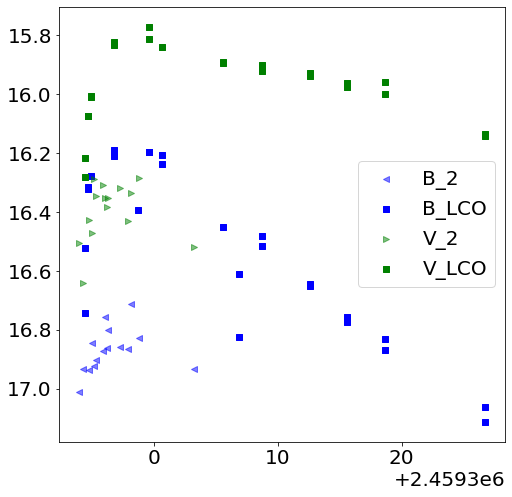

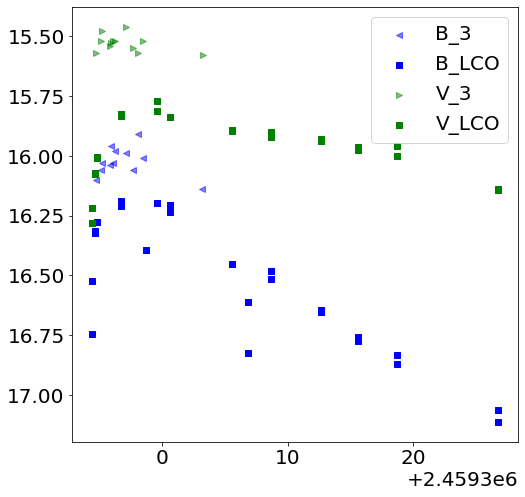

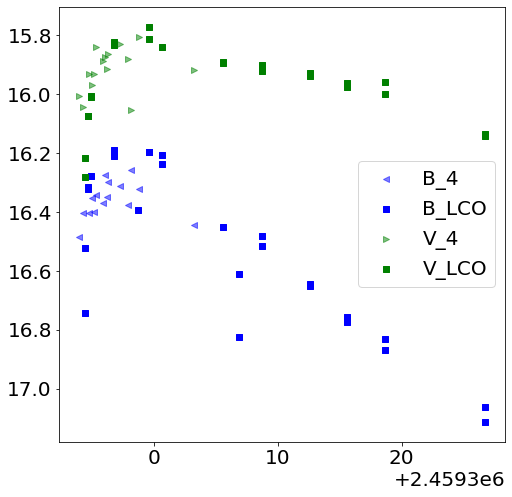

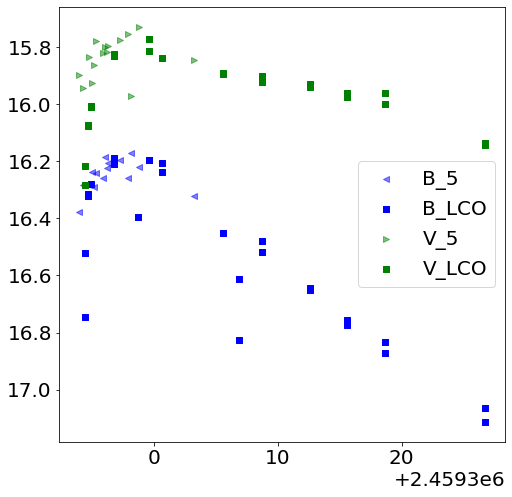

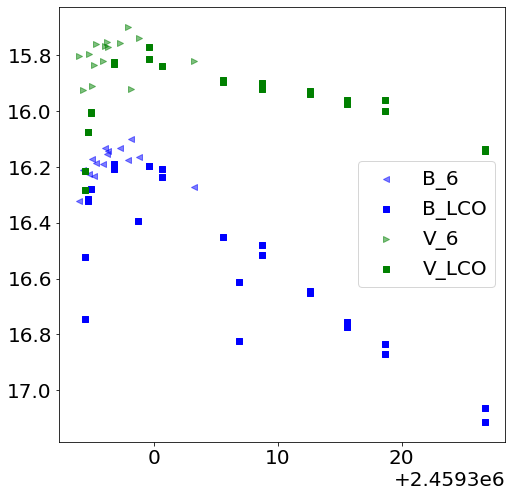

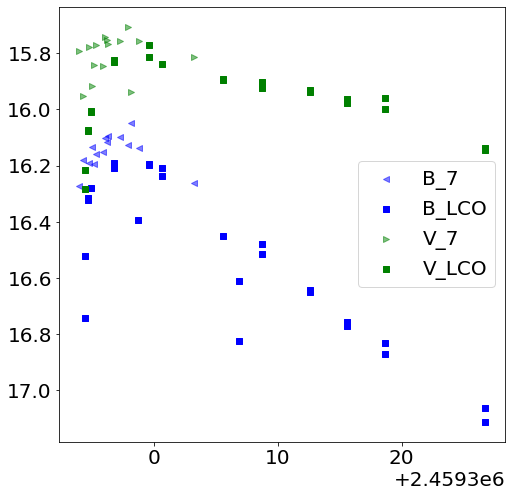

In [6]:
#### comparing swift aperture size changes
def plotswiftdf(df,radius):
    pl.figure(figsize=(8,8))
    colorDict = {'UVW2':'black', 'UVM2':'pink', 'UVW1':'violet', 'U':'darkviolet', 'B':'blue', 'V':'green',\
          'g': 'lightblue', 'r': 'orange', 'i': 'darkred', 'R': 'orange', 'I': 'darkred'}
    markerDict = {'UVW2':'d', 'UVM2':'D', 'UVW1':'s', 'U':'o', 'B':'<', 'V':'>',\
              'g': 'd', 'r': 'D', 'i': 's', 'R': 'D', 'I': 's'}
    offDict = {'UVW2': 3.0, 'UVM2': 2.5, 'UVW1': 2.0, 'U': 1.5, 'B': 0.5, 'V': 0.0,\
              'g': -0.5, 'r': -1.0, 'i': -1.5, 'R': -1.0, 'I': -1.5}
    
    for filt in list(set(df['filter'])):
        if filt == 'B' or filt == 'V':
            ldf = lcodf[(lcodf['filter'] == filt)]
            tdf = df[(df['filter'] == filt)]
            if radius == '3':
                pl.scatter(tdf['MJD']+2400000.5,tdf['ABmag']+offDict[filt],
                            label=filt+'_'+radius,marker=markerDict[filt],color=colorDict[filt],alpha=0.5)
                pl.scatter(ldf['mjd']+2400000.5,ldf['mag']+offDict[filt],
                            label=filt+'_LCO',marker='s',color=colorDict[filt])
            else:
                pl.scatter(tdf['jd'],tdf['mag']+offDict[filt],
                            label=filt+'_'+radius,marker=markerDict[filt],color=colorDict[filt],alpha=0.5)
                pl.scatter(ldf['mjd']+2400000.5,ldf['mag']+offDict[filt],
                            label=filt+'_LCO',marker='s',color=colorDict[filt])
            
    pl.gca().invert_yaxis()
    pl.legend()
    pl.show()
    return
    
swift2 = pd.read_csv(phot_path+'2021gmj_swift_r2.dat',delimiter=r'\s+',header=None)
swift4 = pd.read_csv(phot_path+'2021gmj_swift_r4.dat',delimiter=r'\s+',header=None)
swift5 = pd.read_csv(phot_path+'2021gmj_swift_r5.dat',delimiter=r'\s+',header=None)
swift6 = pd.read_csv(phot_path+'2021gmj_swift_r6.dat',delimiter=r'\s+',header=None)
swift7 = pd.read_csv(phot_path+'2021gmj_swift_r7.dat',delimiter=r'\s+',header=None)

swift2.columns = ['jd','mag','dmag','filter','?']
swift4.columns = ['jd','mag','dmag','filter','?']
swift5.columns = ['jd','mag','dmag','filter','?']
swift6.columns = ['jd','mag','dmag','filter','?']
swift7.columns = ['jd','mag','dmag','filter','?']

plotswiftdf(swift2,'2')
plotswiftdf(swiftdf,'3')
plotswiftdf(swift4,'4')
plotswiftdf(swift5,'5')
plotswiftdf(swift6,'6')
plotswiftdf(swift7,'7')

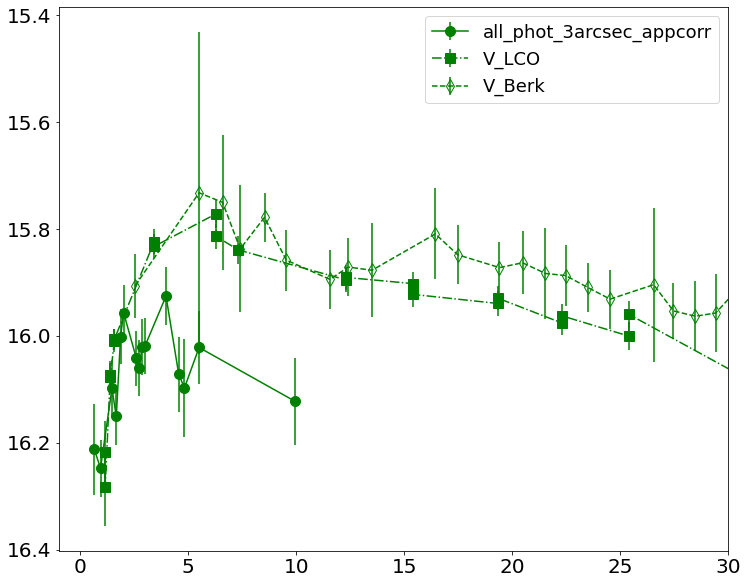

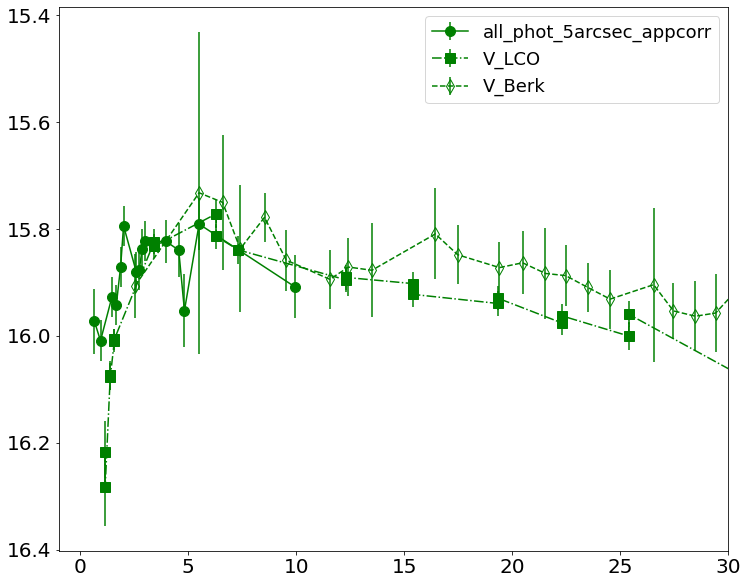

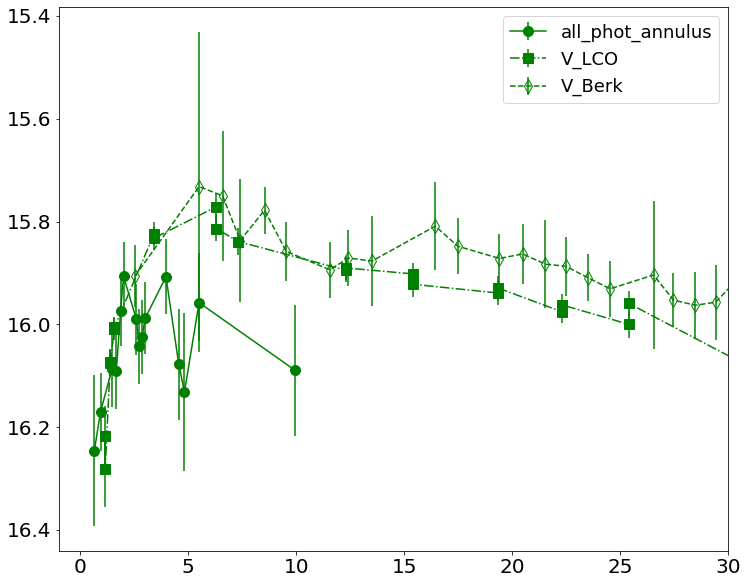

In [43]:
import numpy as np
import json
_lc = ['annulus_noappcorr.json','all_phot_annulus.json','annulus_noappcorr_5.json']
_lc = ['all_phot_3arcsec_appcorr.json','all_phot_5arcsec_appcorr.json','all_phot_annulus.json']
berk_df = pd.read_csv(phot_path+'Berkeley_parsed.csv')

for lc in _lc:
    

    lcs = json.load(open(lc))
    for filt,color in zip(['V'],['g']):
    #lcs = np.genfromtxt(lc,dtype={'names':('JD','mag','mage','filt','exp'),'formats':('f8','f8','f8','S5','f8')})
        pl.figure(figsize=(12,10))
        #t,m,me = np.asarray(lcs[filt])
        try:
            t,m,me = np.asarray(lcs[filt][0]),np.asarray(lcs[filt][3]),np.asarray(lcs[filt][4])
        except:
            t,m,me = np.asarray(lcs[filt])
        ldf = lcodf[(lcodf['filter'] == filt)]
        bdf = berk_df[berk_df['filter']==filt]
        pl.errorbar(t-t0,m,yerr=me,marker='o',label=lc.split('.')[0],color=color,markersize=10)
        pl.errorbar(ldf['mjd']+2400000.5-t0,ldf['mag'],yerr=ldf['dmag'],linestyle='-.',markersize=10,
                            label=filt+'_LCO',marker='s',color=color)
        pl.errorbar(bdf['mjd']+2400000.5-t0,bdf['mag'],yerr=bdf['dmag'],markersize=10,
                            label=filt+'_Berk',marker='d',color=color,linestyle='--',fillstyle='none')
        
        pl.xlim(-1,30)
    
        pl.legend(fontsize=18)
        pl.gca().invert_yaxis()